# Nafisur Rahman
nafisur21@gmail.com<br>
https://www.linkedin.com/in/nafisur-rahman

# Titanic Survival
Predict who survived the titanic disaster

## About This Project
This is my first kaggle project based on very famous kaggle dataset of "Titanic: Machine Learning from Disaster".

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

# 1. Loading libraries and Dataset

For any data science project first we have to get the dataset. 
## Extracting Data
There are many ways from where we can get the dataset such as:-
1. Databases
2. Websites
3. API
4. Web Scraping etc.

Titanic dataset can be directly downloaded from kaggle website "https://www.kaggle.com/c/titanic/data". 


### import packages

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

### importing data
Loading the raw data which we have downloaded from kaggle and saved in local system.

In [178]:
df_train_raw=pd.read_csv("titanic/data/raw/train.csv")
df_test_raw=pd.read_csv("titanic/data/raw/test.csv")

# 2. Exploring and Processing Data / Cleaning and Organizing Data / Data Analysis / Data Analytics


According to CrowdFlower data science report, Data scientist spend 60% of their time in cleaning and organizing data. 
Before we work with the data first we have to clean and organize it in a proper formate.
<img src="rawtoprocesseddata.JPG">

The output of this steps (2. Exploring and processing data) is processed dataset which we will directly use for machine learning model prediction.

This Steps includes:-
-  2.Exploring and Processing Data
    * Basic Exploratory Data Analysis (EDA)
    * Data Munging / Data Wrangling
        * Data cleaning
        * Data Editing
        * Handling Missing Data
        * Handling Outliers
    * Feature Engineering
    * Visualization

Data Cleaning: Removing erroneous data from the dataset.<br>
Data Editing: Correcting error in the dataset. Example character is inserted in place of number.  

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the first step in data analysis process. Here, we make sense of the data and then figure out what questions to ask and how to frame them, as well as how best to manipulate the available data to get the answers we need.
We do this by taking a broad look at patterns, trends, outliers, unexpected results and so on in our existing data, using visual and quantitative methods to get a sense of the story.
Exploratory data analysis is often described as a philosophy, and there are no hard-and-fast rules for how you approach it. 


* Exploratory Data Analysis
    * Basic sturture
    * Summary statistics
    * Distributions
    * Grouping
    * Crosstabs
    * Pivots

### Basic Structures
    how many rows(observations) and cloumns(features)
    columns data types
    columns names
    column selection
    indexing using .loc and .iloc
    filtering rows based on condition
    .shape
    .info()
    .head() and .tail()
    .concat(())
    .set_index()
    list(df.columns)
    print(df.to_string())

In [179]:
# use .info() to get brief information about the dataframe 
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [180]:
df_train_raw.shape

(891, 12)

In [181]:
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [182]:
df_test_raw.shape

(418, 11)

Adding "Survived" column in the test dataset with a default value of -999 and then joining both the dataset together. It will help in visualization.

In [183]:
df_test_withSurvived=df_test_raw
df_test_withSurvived['Survived']=-999
df_test_withSurvived.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-999
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-999
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-999
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-999
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-999


In [184]:
# joining tarin and test raw dataset
df=pd.concat((df_train_raw,df_test_withSurvived),axis=0)
df.shape

(1309, 12)

In [185]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,-999,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,-999,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,-999,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,-999,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,-999,2668


In [186]:
df.set_index("PassengerId",inplace=True)
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-999,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-999,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-999,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-999,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-999,2668


In [187]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [189]:
# use .head(n) to get top-n rows
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742


In [190]:
# column selection using dot
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [191]:
# if whant to see all the rows or columns then use list
list(df.Name)

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Rice, Master. Eugene',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Fynney, Mr. Joseph J',
 'Beesley, Mr. Lawrence',
 'McGowan, Miss. Anna "Annie"',
 'Sloper, Mr. William Thompson',
 'Palsson, Miss. Torborg Danira',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Emir, Mr. Farred Chehab',
 'Fortune, Mr. Charles Alexander',
 '

In [192]:
list(df.columns)

['Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket']

In [193]:
print(df.to_string())

               Age            Cabin Embarked      Fare                                               Name  Parch  Pclass     Sex  SibSp  Survived              Ticket
PassengerId                                                                                                                                                          
1            22.00              NaN        S    7.2500                            Braund, Mr. Owen Harris      0       3    male      1         0           A/5 21171
2            38.00              C85        C   71.2833  Cumings, Mrs. John Bradley (Florence Briggs Th...      0       1  female      1         1            PC 17599
3            26.00              NaN        S    7.9250                             Heikkinen, Miss. Laina      0       3  female      0         1    STON/O2. 3101282
4            35.00             C123        S   53.1000       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0       1  female      1         1              113803
5   

In [194]:
# selection using column name as string
df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [195]:
# selecting multiple columns using a list of column name strings
df[['Name','Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
6,"Moran, Mr. James",NaN
7,"McCarthy, Mr. Timothy J",54.0
8,"Palsson, Master. Gosta Leonard",2.0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0


In [196]:
# indexing : use loc for label based indexing 
# all columns
df.loc[5:10,]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [197]:
# selecting column range
df.loc[5:10, 'Age' : 'Pclass']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass
PassengerId,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2


In [198]:
# selecting discrete columns
df.loc[5:10, ['Survived', 'Fare','Embarked']]

,Survived,Fare,Embarked
PassengerId,,,
5,0,8.0500,S
6,0,8.4583,Q
7,0,51.8625,S
8,0,21.0750,S
9,1,11.1333,S
10,1,30.0708,C


In [199]:
# indexing : use iloc for position based indexing 
df.iloc[5:10, 3:8]

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
6,8.4583,"Moran, Mr. James",0,3,male
7,51.8625,"McCarthy, Mr. Timothy J",0,1,male
8,21.0750,"Palsson, Master. Gosta Leonard",1,3,male
9,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female
10,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female


In [200]:
# filter rows based on the condition 
male_passengers = df.loc[df.Sex == 'male',:]
print('Number of male passengers : ',len(male_passengers))

Number of male passengers :  843


In [201]:
# Alternate method
male_passengers = df[df['Sex'] == 'male']
print('Number of male passengers : ',len(male_passengers))

Number of male passengers :  843


In [202]:
# use & or | operators to build complex logic
male_passengers_first_class = df[((df['Sex'] == 'male') & (df['Pclass'] == 1))]
print('Number of male passengers in first class: {0}'.format(len(male_passengers_first_class)))

Number of male passengers in first class: 179


### Summary Statistics
* Numerical Features
    * mean
    * median
    * range
    * percentiles
    * variance
    * standard deviation
* Categorical Features
    * total count
    * unique count
    * category count and proportions
    * per category statistics

In [203]:
# use .describe() to get statistics for all numeric columns
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-318.747135
std,14.413493,51.758668,0.865560,0.837836,1.041658,466.107167
min,0.170000,0.000000,0.000000,1.000000,0.000000,-999.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-999.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [204]:
# median Fare
print('Median fare :',df['Fare'].median())

Median fare : 14.4542


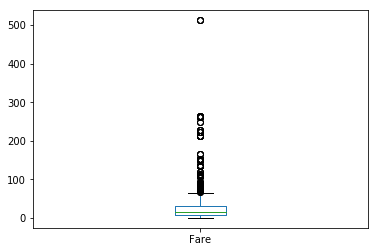

In [205]:
# box-whisker plot
df.Fare.plot(kind='box')

In [206]:
help(df.Fare.plot)

Help on SeriesPlotMethods in module pandas.plotting._core object:

class SeriesPlotMethods(BasePlotMethods)
 |  Series plotting accessor and method
 |  
 |  Examples
 |  --------
 |  >>> s.plot.line()
 |  >>> s.plot.bar()
 |  >>> s.plot.hist()
 |  
 |  Plotting methods can also be accessed by calling the accessor as a method
 |  with the ``kind`` argument:
 |  ``s.plot(kind='line')`` is equivalent to ``s.plot.line()``
 |  
 |  Method resolution order:
 |      SeriesPlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)
 |      Make plots of Series using matp

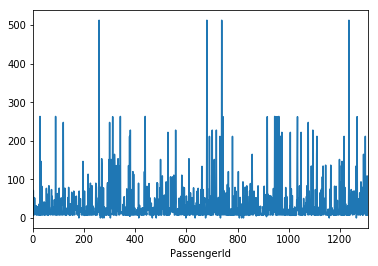

In [207]:
df.Fare.plot(kind='line')

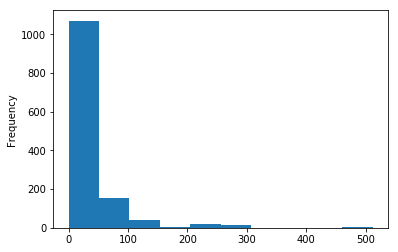

In [208]:
df.Fare.plot(kind='hist')

In [209]:
# use .describe(include='all') to get statistics for all  columns including non-numeric ones
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-318.747135,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,466.107167,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-999.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-999.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


#### Categorical feature "Embarked"

In [211]:
# Categorical feature "Embarked"
pd.DataFrame({'count': df.groupby(['Embarked']).size()}).reset_index()

,Embarked,count
0,C,270
1,Q,123
2,S,914


In [212]:
pd.DataFrame({'count': df.groupby(['Embarked']).size()})

,count
Embarked,
C,270
Q,123
S,914


In [213]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [214]:
df.Embarked.value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: Embarked, dtype: int64

In [215]:
df.Embarked.value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

#### Categorical feature "Sex"

In [216]:
pd.DataFrame({'count' : df.groupby( ['Sex'] ).size()})

,count
Sex,
female,466
male,843


In [217]:
df.Sex.value_counts(dropna=False)

male      843
female    466
Name: Sex, dtype: int64

In [218]:
# categorical column : Proprotions
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

#### Target column "Survived"

In [219]:
# Target columns
df.Survived.value_counts() 

 0      549
-999    418
 1      342
Name: Survived, dtype: int64

In [220]:
df[df.Survived != -999].Survived.value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [221]:
df[df.Survived != -999].Survived.value_counts(normalize=True) 

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [222]:
# count : Passenger class
df.Pclass.value_counts(dropna=False) 

3    709
1    323
2    277
Name: Pclass, dtype: int64

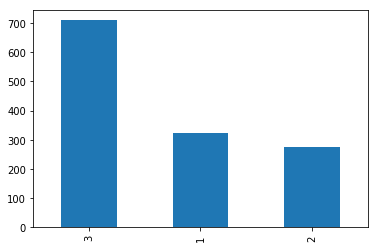

In [223]:
# visualize counts
df.Pclass.value_counts().plot(kind='bar')

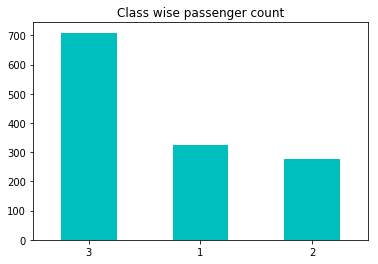

In [224]:
# title : to set title, color : to set color,  rot : to rotate labels 
df.Pclass.value_counts().plot(kind='bar',rot = 0, title='Class wise passenger count', color='c');

In [225]:
df.Parch.value_counts(dropna=False)

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

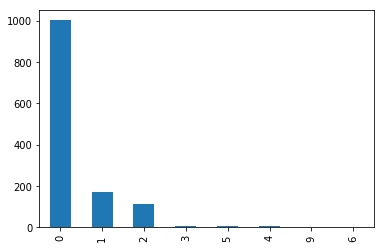

In [226]:
df.Parch.value_counts().plot(kind='bar')

### Grouping and Aggregations
    .groupby()
    .agg

In [227]:
# group by 
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [228]:
# group by 
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [229]:
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [230]:
df.groupby(['Pclass']).Age.mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [231]:
df.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [232]:
df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [233]:
# more complicated aggregations 
aggregations = {
    'Fare': { # work on the "Fare" column
        'mean_Fare': 'mean',  # get the mean fare
        'median_Fare': 'median', # get median fare
        'max_Fare': max,
        'min_Fare': np.min
    },
    'Age': {     # work on the "Age" column
        'median_Age': 'median',   # Find the max, call the result "max_date"
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x)  # Calculate the age range per group
    }
}

In [234]:
df.groupby(['Pclass']).agg(aggregations)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_Fare median_Fare  max_Fare min_Fare median_Age min_Age max_Age   
Pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    0.92    80.0   
2       21.179196     15.0458   73.5000      0.0       29.0    0.67    70.0   
3       13.302889      8.0500   69.5500      0.0       24.0    0.17    74.0   

                  
       range_Age  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [235]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

### Crosstab
    pd.crosstab()

In [236]:
# crosstab on Sex and Pclass
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


In [237]:
# crosstab on Sex and Survived
pd.crosstab(df[df['Survived']!=-999].Sex, df[df['Survived']!=-999].Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


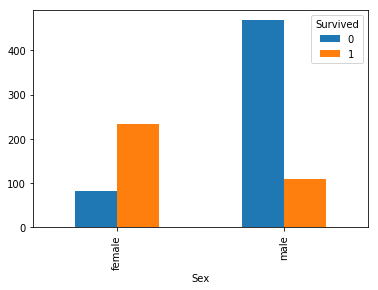

In [238]:
pd.crosstab(df[df['Survived']!=-999].Sex, df[df['Survived']!=-999].Survived).plot(kind='bar')

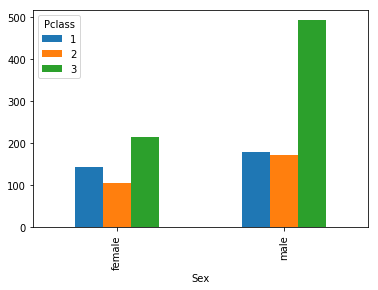

In [239]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

### Pivots
    .pivot_table()

In [240]:
# pivot table
df.pivot_table(index='Sex',columns = 'Pclass',values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [241]:
# same thing we can obtain by groupby
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [242]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


### Distributions
    .plot()
    .plot.scatter()

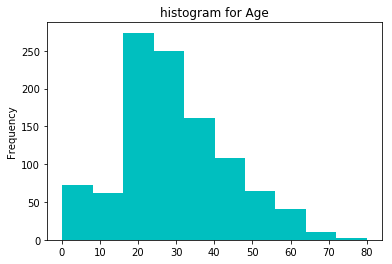

In [243]:
# use hist to create histogram
df.Age.plot(kind='hist', title='histogram for Age', color='c');

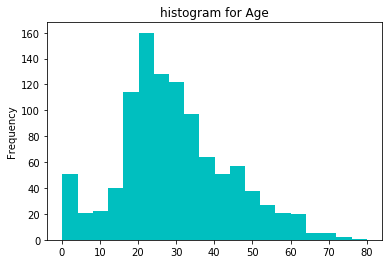

In [244]:
# use bins to add or remove bins
df.Age.plot(kind='hist', title='histogram for Age', color='c', bins=20);

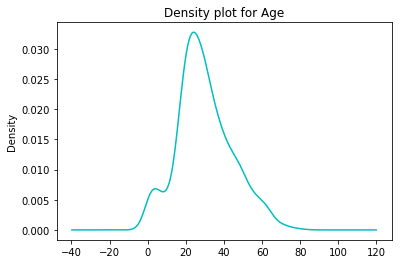

In [245]:
# use kde for density plot
df.Age.plot(kind='kde', title='Density plot for Age', color='c');

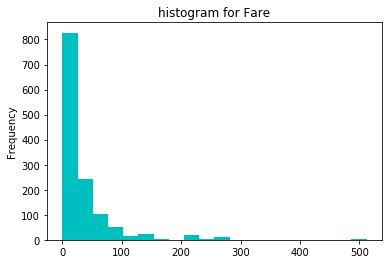

In [246]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', color='c', bins=20);

In [247]:
print('skewness for age : {0:.2f}'.format(df.Age.skew()))
print('skewness for fare : {0:.2f}'.format(df.Fare.skew()))

skewness for age : 0.41
skewness for fare : 4.37


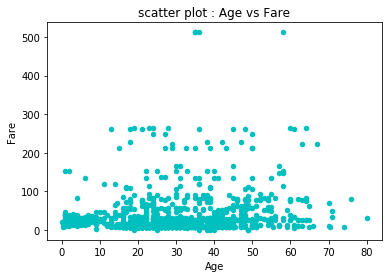

In [248]:
# use scatter plot for bi-variate distribution
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare');

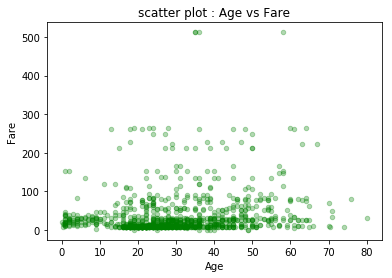

In [249]:
# use alpha to set the transparency
df.plot.scatter(x='Age', y='Fare', color='g', title='scatter plot : Age vs Fare', alpha=0.3);

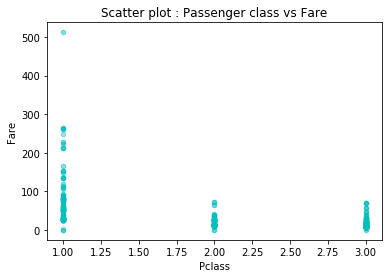

In [250]:
df.plot.scatter(x='Pclass', y='Fare', color='c', title='Scatter plot : Passenger class vs Fare', alpha=0.15);

## Data Munging
* Handling Missing Values
* Handling Outliers

In [251]:
df1=df

### Handling Missing Values

In [252]:
df.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64

#### Feature : Embarked 

In [253]:
# extract rows with Embarked as Null
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [254]:
# Passenger with same ticket number to those who are having Embarked as NaN
df[df['Ticket']=='113572']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [255]:
# how many people embarked at different points
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [256]:
# which embarked point has higher survival count
pd.crosstab(df[df.Survived != -999].Survived, df[df.Survived != -999].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


Option 1:

In [257]:
# impute the missing values with 'S'
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# df.Embarked.fillna('S', inplace=True)

In [258]:
# explore the fare of each class for each embarkment point
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

Option 2:

In [259]:
# replace the missing values with 'C'
df.Embarked.fillna('C', inplace=True)

In [260]:
# check if any null value remaining
df.isnull().sum()

Age          263
Cabin       1014
Embarked       0
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64

#### Feature : Fare

In [261]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-999,3701


In [262]:
df[df['Ticket']=='3701']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-999,3701


In [263]:
df.groupby(['Pclass']).Fare.mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [264]:
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [265]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [266]:
df.groupby(['Pclass','Embarked']).Fare.mean()

Pclass  Embarked
1       C           106.469871
        Q            90.000000
        S            72.148094
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

In [267]:
# Replacing the NaN value by median fare of Pclass=3 and Embarked=S
df.Fare.fillna(8.05,inplace=True)

In [268]:
df.isnull().sum()

Age          263
Cabin       1014
Embarked       0
Fare           0
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64

#### Feature : Age

In [269]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
33,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,3,female,0,1,335677
37,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,3,male,0,1,2677


##### option 1 : replace all missing age with mean value

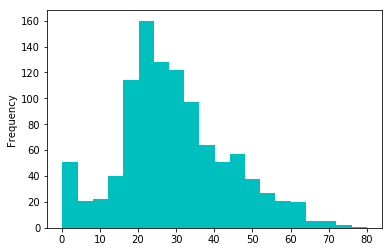

In [270]:
df.Age.plot(kind='hist', bins=20, color='c');

In [271]:
df.Age.mean()

29.881137667304014

In [272]:
df.Age.median()

28.0

issue : due to few high values of 70's and 80's pushing the overall mean

In [273]:
# replace the missing values by mean
# df.Age.fillna(df.Age.mean(), inplace=True)

##### Option 2: Replace the missing values by median age of gender

In [274]:
df.groupby(['Sex']).Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

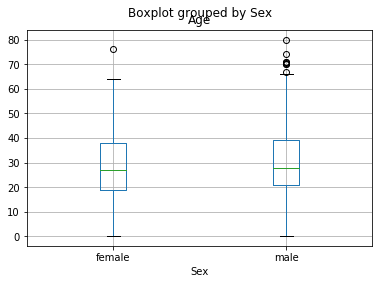

In [275]:
# visualize using boxplot
df[df.Age.notnull()].boxplot('Age','Sex');

In [276]:
# replace : 
# age_sex_median = df.groupby('Sex').Age.transform('median')
# df.Age.fillna(age_sex_median, inplace=True)

##### option 3 : replace with median age of Pclass

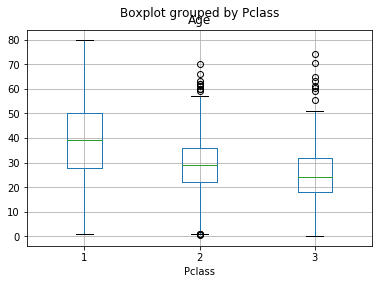

In [277]:
df[df.Age.notnull()].boxplot('Age','Pclass');

In [278]:
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [279]:
# replace : 
# pclass_age_median = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(pclass_age_median , inplace=True)

##### option 4 : replace with median age of title

In [280]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [281]:
name=df.Name[1]
name

'Braund, Mr. Owen Harris'

In [282]:
name.split(sep=',')

['Braund', ' Mr. Owen Harris']

In [283]:
name.split(sep=',')[1]

' Mr. Owen Harris'

In [284]:
firstname=name.split(sep=',')[1]
firstname.split(sep='.')

[' Mr', ' Owen Harris']

In [285]:
title=firstname.split(sep='.')[0].lower()
title

' mr'

In [286]:
# Function to extract the title from the name 
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [287]:
# use map function to apply the function on each Name value row i
df.Name.map(lambda x : GetTitle(x)) # alternatively you can use : df.Name.map(GetTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
8       master
9          mrs
10         mrs
11        miss
12        miss
13          mr
14          mr
15        miss
16         mrs
17      master
18          mr
19         mrs
20         mrs
21          mr
22          mr
23        miss
24          mr
25        miss
26         mrs
27          mr
28          mr
29        miss
30          mr
         ...  
1280        mr
1281    master
1282        mr
1283       mrs
1284    master
1285        mr
1286        mr
1287       mrs
1288        mr
1289       mrs
1290        mr
1291        mr
1292      miss
1293        mr
1294      miss
1295        mr
1296        mr
1297        mr
1298        mr
1299        mr
1300      miss
1301      miss
1302      miss
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [288]:
df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [289]:
# Function to extract the title from the name 
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]



In [290]:
# create Title feature
df['Title'] =  df.Name.map(lambda x : GetTitle(x))

In [291]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


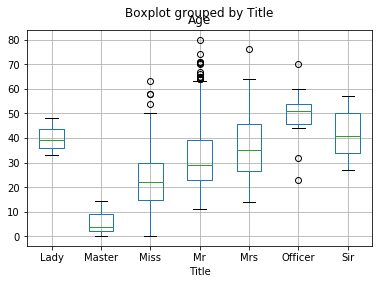

In [292]:
# Box plot of Age with title
df[df.Age.notnull()].boxplot('Age','Title');

In [293]:
# replace missing values
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median , inplace=True)

In [294]:
df.isnull().sum()

Age            0
Cabin       1014
Embarked       0
Fare           0
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Title          0
dtype: int64

### Handling Outlier

Age

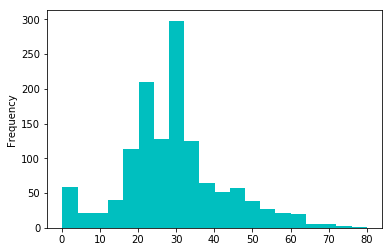

In [295]:
df.Age.plot(kind='hist', bins=20, color='c');

In [296]:
df[df['Age']>65]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
34,66.0,NaN,S,10.5000,"Wheadon, Mr. Edward H",0,2,male,0,0,C.A. 24579,Mr
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
673,70.0,NaN,S,10.5000,"Mitchell, Mr. Henry Michael",0,2,male,0,0,C.A. 24580,Mr
746,70.0,B22,S,71.0000,"Crosby, Capt. Edward Gifford",1,1,male,1,0,WE/P 5735,Officer
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
973,67.0,C55 C57,S,221.7792,"Straus, Mr. Isidor",0,1,male,1,-999,PC 17483,Mr


Fare

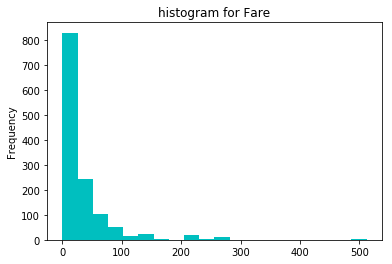

In [297]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', bins=20, color='c');

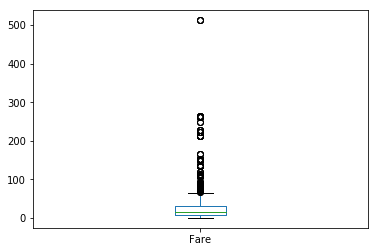

In [298]:
# box plot to indentify outliers 
df.Fare.plot(kind='box');

In [299]:
# look into the outliers
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-999,PC 17755,Mrs


In [300]:
# Try some transformations to reduce the skewness
LogFare = np.log(df.Fare + 1.0) # Adding 1 to accomodate zero fares : log(0) is not defined

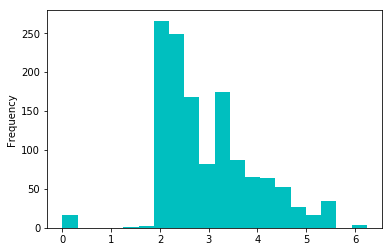

In [301]:
# Histogram of LogFare
LogFare.plot(kind='hist', color='c', bins=20);

In [302]:
# binning
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
8        (14.454, 31.275]
9         (7.896, 14.454]
10       (14.454, 31.275]
11       (14.454, 31.275]
12       (14.454, 31.275]
13        (7.896, 14.454]
14       (14.454, 31.275]
15        (-0.001, 7.896]
16       (14.454, 31.275]
17       (14.454, 31.275]
18        (7.896, 14.454]
19       (14.454, 31.275]
20        (-0.001, 7.896]
21       (14.454, 31.275]
22        (7.896, 14.454]
23        (7.896, 14.454]
24      (31.275, 512.329]
25       (14.454, 31.275]
26      (31.275, 512.329]
27        (-0.001, 7.896]
28      (31.275, 512.329]
29        (-0.001, 7.896]
30        (-0.001, 7.896]
              ...        
1280      (-0.001, 7.896]
1281     (14.454, 31.275]
1282    (31.275, 512.329]
1283    (31.275, 512.329]
1284     (14.454, 31.275]
1285      (7.896, 14.454]
1286     (14.454, 31.275]


In [303]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']) # discretization

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
6             low
7       very_high
8            high
9             low
10           high
11           high
12           high
13            low
14           high
15       very_low
16           high
17           high
18            low
19           high
20       very_low
21           high
22            low
23            low
24      very_high
25           high
26      very_high
27       very_low
28      very_high
29       very_low
30       very_low
          ...    
1280     very_low
1281         high
1282    very_high
1283    very_high
1284         high
1285          low
1286         high
1287    very_high
1288     very_low
1289    very_high
1290     very_low
1291     very_low
1292    very_high
1293         high
1294    very_high
1295    very_high
1296         high
1297          low
1298          low
1299    very_high
1300     very_low
1301          low
1302     very_low
1303    very_hig

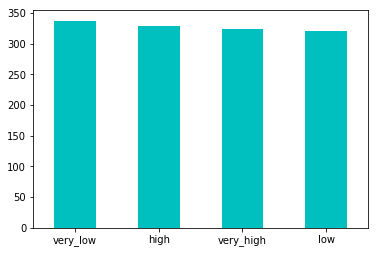

In [304]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar', color='c', rot=0);

In [305]:
# create fare bin feature
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

## Feature Engineering

#### Feature : Age State ( Adult or Child )

In [306]:
# AgeState based on Age
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult','Child')

In [307]:
# AgeState Counts
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [308]:
pd.crosstab(df[df['Survived']!=-999].Survived,df[df['Survived']!=-999].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


#### Feature : FamilySize

In [309]:
# Family : Adding Parents with Siblings
df['FamilySize'] = df.Parch + df.SibSp + 1 # 1 for self

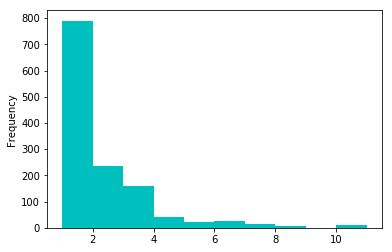

In [310]:
# explore the family feature
df['FamilySize'].plot(kind='hist', color='c');

In [311]:
pd.crosstab(df[df.Survived != -999].Survived, df[df.Survived != -999].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


#### Feature : IsMother

In [312]:
# a lady aged more thana 18 who has Parch >0 and is married (not Miss)
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1, 0)

In [313]:
# Crosstab with IsMother
pd.crosstab(df[df.Survived != -999].Survived, df[df.Survived != -999].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


#### Deck

In [314]:
# explore Cabin values
df.Cabin

PassengerId
1               NaN
2               C85
3               NaN
4              C123
5               NaN
6               NaN
7               E46
8               NaN
9               NaN
10              NaN
11               G6
12             C103
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              D56
23              NaN
24               A6
25              NaN
26              NaN
27              NaN
28      C23 C25 C27
29              NaN
30              NaN
           ...     
1280            NaN
1281            NaN
1282            B24
1283            D28
1284            NaN
1285            NaN
1286            NaN
1287            C31
1288            NaN
1289            B41
1290            NaN
1291            NaN
1292             C7
1293            NaN
1294            NaN
1295            NaN
1296            D40
1297            D38
1298    

In [315]:
# use unique to get unique values for Cabin feature
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [316]:
cabinname=df.Cabin[4]
cabinname

'C123'

In [317]:
str(cabinname)[0]

'C'

In [319]:
# extract first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [320]:
df.Deck.unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [321]:
df.Deck.value_counts()

Z    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

Here Deck=Z represent NaN value. We can see Deck name equal to T is occuring only one time and this may be error. Therefor replacing Deck=T with Z

In [322]:
# set the value to NaN
df.loc[df.Deck == 'T', 'Deck'] = 'Z'

In [323]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [324]:
# use crosstab to look into survived feature cabin wise
pd.crosstab(df[df.Survived != -999].Survived, df[df.Survived != -999].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         295 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 210.2+ KB


### Categorical Feature Encoding

In [326]:
# sex
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [327]:
# columns Deck, Pclass, Title, AgeState
df = pd.get_dummies(df,columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 295 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

##### Drop and reorder columns

In [329]:
df2=df

In [330]:
df.drop(['Cabin','Name','Sex','Ticket','Parch','SibSp'],axis=1,inplace=True)

In [331]:
# reorder columns
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

In [333]:
df.head()

,Survived,Age,Fare,FamilySize,IsMother,IsMale,Deck_A,Deck_B,Deck_C,Deck_D,...,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,1,38.0,71.2833,2,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
3,1,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,1,35.0,53.1000,2,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
5,0,35.0,8.0500,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


### Save Processed Dataset

In [344]:
import os

In [355]:
processed_data_path = os.path.join('I:\All_Projects\DataSciencePluralsight','Processed_data')
write_train_path = os.path.join(processed_data_path, 'train_processed.csv')
write_test_path = os.path.join(processed_data_path, 'test_processed.csv')

In [356]:
# train data
df.loc[df.Survived != -999].to_csv(write_train_path) 
# test data
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -999, columns].to_csv(write_test_path) 

## Advanced visualization using MatPlotlib

In [357]:
import matplotlib.pyplot as plt
%matplotlib inline

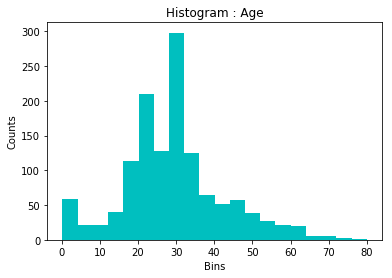

In [358]:
plt.hist(df.Age, bins=20, color='c')
plt.title('Histogram : Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

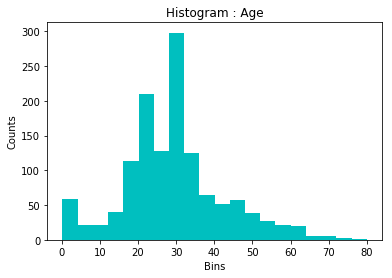

In [359]:
f , ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c')
ax.set_title('Histogram : Age')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

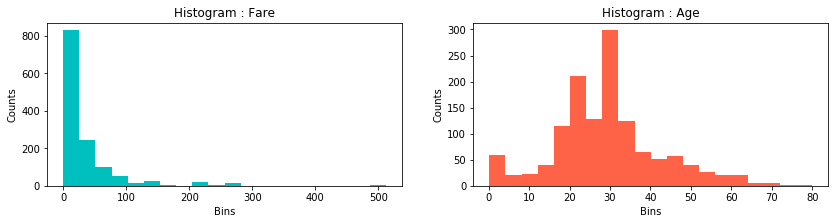

In [360]:
# Add subplots
f , (ax1, ax2) = plt.subplots(1, 2 , figsize=(14,3))

ax1.hist(df.Fare, bins=20, color='c')
ax1.set_title('Histogram : Fare')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='tomato')
ax2.set_title('Histogram : Age')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()

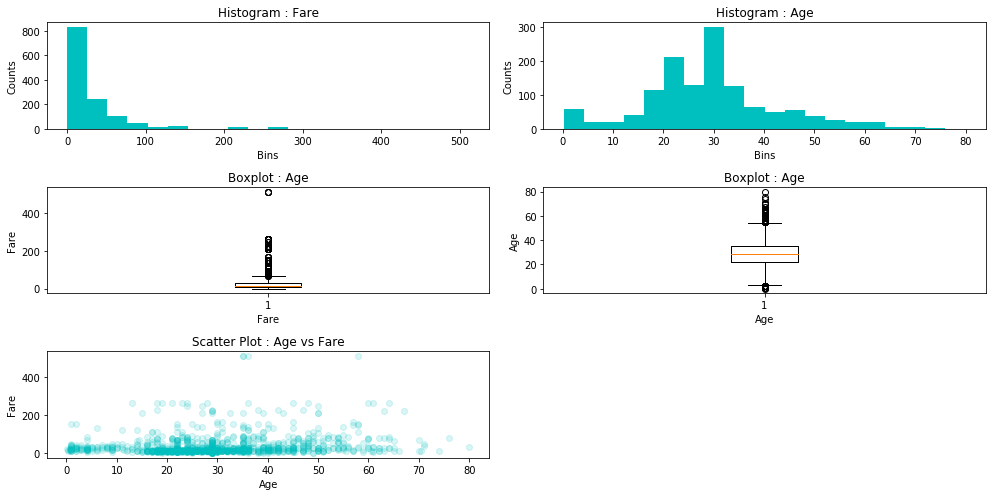

In [361]:
# Adding subplots
f , ax_arr = plt.subplots(3 , 2 , figsize=(14,7))

# Plot 1
ax_arr[0,0].hist(df.Fare, bins=20, color='c')
ax_arr[0,0].set_title('Histogram : Fare')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

# Plot 2
ax_arr[0,1].hist(df.Age, bins=20, color='c')
ax_arr[0,1].set_title('Histogram : Age')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

# Plot 3
ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Boxplot : Age')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

# Plot 4
ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Boxplot : Age')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

# Plot 5
ax_arr[2,0].scatter(df.Age, df.Fare, color='c', alpha=0.15)
ax_arr[2,0].set_title('Scatter Plot : Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2,1].axis('off')
plt.tight_layout()


plt.show()

In [365]:
# family size 
family_survived = pd.crosstab(df[df.Survived != -999].FamilySize, df[df.Survived != -999].Survived)
print (family_survived)

Survived      0    1
FamilySize          
1           374  163
2            72   89
3            43   59
4             8   21
5            12    3
6            19    3
7             8    4
8             6    0
11            7    0


In [366]:
# impact of family size on survival rate
family_survived =  df[df.Survived != -999].groupby(['FamilySize','Survived']).size().unstack()
print (family_survived)

Survived        0      1
FamilySize              
1           374.0  163.0
2            72.0   89.0
3            43.0   59.0
4             8.0   21.0
5            12.0    3.0
6            19.0    3.0
7             8.0    4.0
8             6.0    NaN
11            7.0    NaN


In [367]:
family_survived.columns = ['Not Survived', 'Survived']

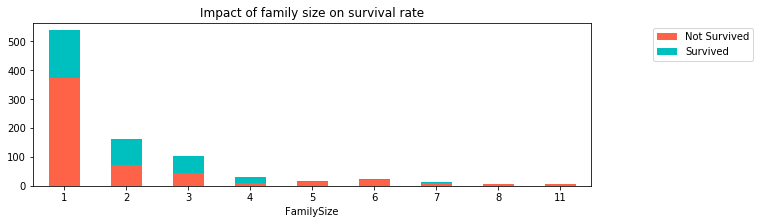

In [368]:
# Mix and Match
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Impact of family size on survival rate')
family_survived.plot(kind='bar', stacked=True, color=['tomato','c'], ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()

In [369]:
family_survived.sum(axis = 1)

FamilySize
1     537.0
2     161.0
3     102.0
4      29.0
5      15.0
6      22.0
7      12.0
8       6.0
11      7.0
dtype: float64

In [370]:
scaled_family_survived = family_survived.div(family_survived.sum(axis=1), axis=0)

In [371]:
scaled_family_survived.columns = ['Not Survived', 'Survived']

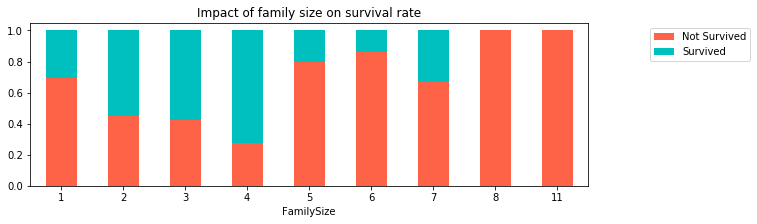

In [372]:
# Mix and Match
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Impact of family size on survival rate')
scaled_family_survived.plot(kind='bar', stacked=True, color=['tomato','c'], ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()